# Linear Regression

Linear Regression is a supervised learning technique, used in regression tasks. It is the most classic and simple technique

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## Data

The Boston data frame has 14 columns.
This data frame contains the following columns:

    crim: per capita crime rate by town.
    zn: proportion of residential land zoned for lots over 25,000 sq.ft.
    indus: proportion of non-retail business acres per town.
    chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    nox: nitrogen oxides concentration (parts per 10 million).
    rm: average number of rooms per dwelling.
    age: proportion of owner-occupied units built prior to 1940.
    dis: weighted mean of distances to five Boston employment centres.
    rad: index of accessibility to radial highways.
    tax: full-value property-tax rate per /10000 dollars
    ptratio: pupil-teacher ratio by town.
    black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    lstat: lower status of the population (percent).
    medv: median value of owner-occupied homes in /1000$

In [3]:
df = pd.read_csv('boston_data.csv',index_col=0)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


## Visualization

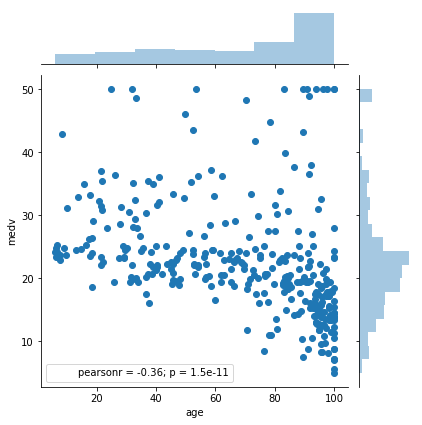

In [7]:
sns.jointplot('age','medv',data=df)

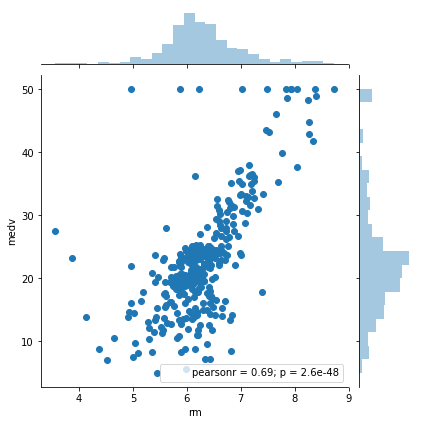

In [8]:
sns.jointplot('rm','medv',df)

we can see that medv is highly correlated with rm

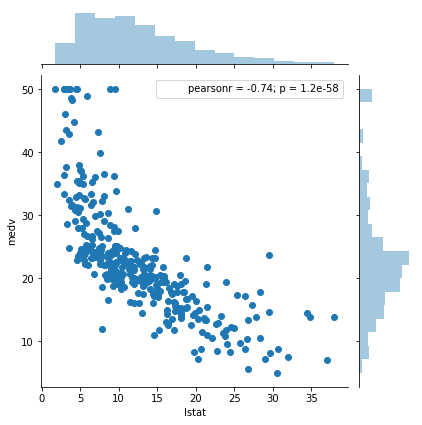

In [9]:
sns.jointplot('lstat','medv',df)

We can see for the lower values of lstat , medv is also decreasing

## Model

Let's build our model by importing it from sklearn library

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()     #initializing the model

### Split the data

We need to split the data in train and test set to evaluate how our model is doing with the new data.

In [12]:
X = df.drop('medv',axis=1)
y = df['medv']

In [13]:
from sklearn.cross_validation import train_test_split

C:\Users\earmbae\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Training the model
Now we can train the linear regression on train set

In [15]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Prediction

In [16]:
pred = model.predict(X_test)

## Model Evaluation

In [17]:
model.score(X_train,y_train)

0.72563056716703267

In [18]:
model.score(X_test,y_test)

0.73903158604254826

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

23.486735195425414